In [2]:
from __future__ import print_function
import os
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_excel('Monthly_CO2_Concentrations.xlsx',
                     converters={'Year': np.int32, 'Month': np.int32})

In [4]:
data.head()

,CO2,Year,Month
0,333.13,1974,5
1,332.09,1974,6
2,331.10,1974,7
3,329.14,1974,8
4,327.36,1974,9


In [5]:
#Create row index of the DataFrame using the Year and Month columns
data.index = data['Year'].astype(str) + '-' + data['Month'].astype(str).map(lambda x: '0'+x if len(x) == 1 else x)
data.head()

,CO2,Year,Month
1974-05,333.13,1974,5
1974-06,332.09,1974,6
1974-07,331.10,1974,7
1974-08,329.14,1974,8
1974-09,327.36,1974,9


In [6]:
data = data.loc[(~pd.isnull(data['CO2']))&\
                (~pd.isnull(data['Year']))&\
                (~pd.isnull(data['Month']))]

In [7]:
data.sort_values(['Year', 'Month'], inplace=True)

(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180.]),
 [Text(-20.0, 0, '1986-02'),
  Text(0.0, 0, '1974-05'),
  Text(20.0, 0, '1976-01'),
  Text(40.0, 0, '1977-09'),
  Text(60.0, 0, '1979-05'),
  Text(80.0, 0, '1981-01'),
  Text(100.0, 0, '1982-09'),
  Text(120.0, 0, '1984-05'),
  Text(140.0, 0, '1986-01'),
  Text(160.0, 0, '1987-09'),
  Text(180.0, 0, '')])

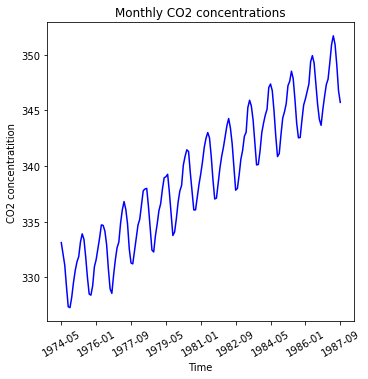

In [8]:
plt.figure(figsize=(5.5, 5.5))
data['CO2'].plot(color='b')
plt.title('Monthly CO2 concentrations')
plt.xlabel('Time')
plt.ylabel('CO2 concentratition')
plt.xticks(rotation=30)
#plt.savefig('plots/ch1/B07887_01_05.png', format='png', dpi=300)

(array([-5.,  0.,  5., 10., 15., 20., 25.]),
 [Text(-5.0, 0, '1981-08'),
  Text(0.0, 0, '1980-01'),
  Text(5.0, 0, '1980-06'),
  Text(10.0, 0, '1980-11'),
  Text(15.0, 0, '1981-04'),
  Text(20.0, 0, '1981-09'),
  Text(25.0, 0, '')])

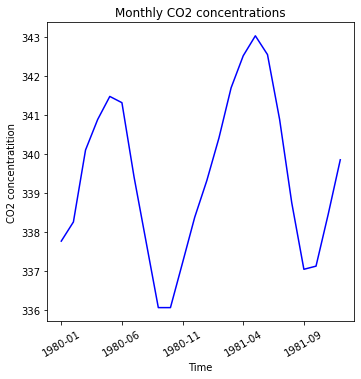

In [9]:
plt.figure(figsize=(5.5, 5.5))
data['CO2'].loc[(data['Year']==1980) | (data['Year']==1981)].plot(color='b')
plt.title('Monthly CO2 concentrations')
plt.xlabel('Time')
plt.ylabel('CO2 concentratition')
plt.xticks(rotation=30)
#plt.savefig('plots/ch1/B07887_01_06.png', format='png', dpi=300)

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
trend_model = LinearRegression(normalize=True, fit_intercept=True)
trend_model.fit(np.arange(data.shape[0]).reshape((-1,1)), data['CO2'])

LinearRegression(normalize=True)

In [12]:
print('Trend model coefficient={} and intercept={}'.format(trend_model.coef_[0],
                                                           trend_model.intercept_)
      )

Trend model coefficient=0.12099301242236025 and intercept=329.45310559006214


In [13]:
residuals = np.array(data['CO2']) - trend_model.predict(np.arange(data.shape[0]).reshape((-1,1)))

(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180.]),
 [Text(-20.0, 0, '1986-02'),
  Text(0.0, 0, '1974-05'),
  Text(20.0, 0, '1976-01'),
  Text(40.0, 0, '1977-09'),
  Text(60.0, 0, '1979-05'),
  Text(80.0, 0, '1981-01'),
  Text(100.0, 0, '1982-09'),
  Text(120.0, 0, '1984-05'),
  Text(140.0, 0, '1986-01'),
  Text(160.0, 0, '1987-09'),
  Text(180.0, 0, '')])

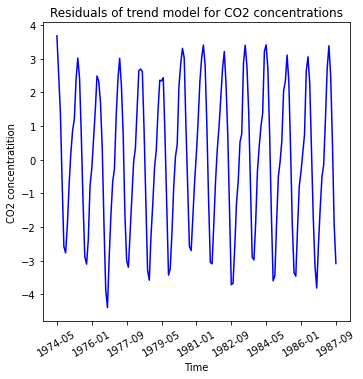

In [14]:
plt.figure(figsize=(5.5, 5.5))
pd.Series(data=residuals, index=data.index).plot(color='b')
plt.title('Residuals of trend model for CO2 concentrations')
plt.xlabel('Time')
plt.ylabel('CO2 concentratition')
plt.xticks(rotation=30)
#plt.savefig('plots/ch1/B07887_01_07.png', format='png', dpi=300)

In [15]:
data['Residuals'] = residuals
month_quarter_map = {1: 'Q1', 2: 'Q1', 3: 'Q1',
                     4: 'Q2', 5: 'Q2', 6: 'Q2',
                     7: 'Q3', 8: 'Q3', 9: 'Q3',
                     10: 'Q4', 11: 'Q4', 12: 'Q4'
                    }
data['Quarter'] = data['Month'].map(lambda m: month_quarter_map.get(m))

In [16]:
seasonal_sub_series_data = data.groupby(by=['Year', 'Quarter'])['Residuals'].aggregate([np.mean, np.std])
seasonal_sub_series_data.columns = ['Quarterly Mean', 'Quarterly Standard Deviation']

In [17]:
#Create row indices of seasonal_sub_series_data using Year & Quarter
seasonal_sub_series_data.reset_index(inplace=True)
seasonal_sub_series_data.index = seasonal_sub_series_data['Year'].astype(str) + '-' + seasonal_sub_series_data['Quarter']
seasonal_sub_series_data.head()

,Year,Quarter,Quarterly Mean,Quarterly Standard Deviation
1974-Q2,1974,Q2,3.096398,0.820946
1974-Q3,1974,Q3,-0.616085,1.991671
1974-Q4,1974,Q4,-1.822397,1.014952
1975-Q1,1975,Q1,0.754624,0.511890
1975-Q2,1975,Q2,2.604978,0.355093


(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.]),
 [Text(-10.0, 0, '1985-Q2'),
  Text(0.0, 0, '1974-Q2'),
  Text(10.0, 0, '1976-Q4'),
  Text(20.0, 0, '1979-Q2'),
  Text(30.0, 0, '1981-Q4'),
  Text(40.0, 0, '1984-Q2'),
  Text(50.0, 0, '1986-Q4'),
  Text(60.0, 0, '')])

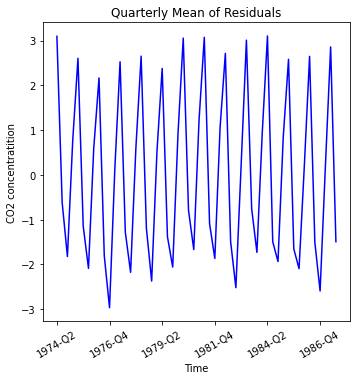

In [18]:
plt.figure(figsize=(5.5, 5.5))
seasonal_sub_series_data['Quarterly Mean'].plot(color='b')
plt.title('Quarterly Mean of Residuals')
plt.xlabel('Time')
plt.ylabel('CO2 concentratition')
plt.xticks(rotation=30)
#plt.savefig('plots/ch1/B07887_01_08.png', format='png', dpi=300)

(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.]),
 [Text(-10.0, 0, '1985-Q2'),
  Text(0.0, 0, '1974-Q2'),
  Text(10.0, 0, '1976-Q4'),
  Text(20.0, 0, '1979-Q2'),
  Text(30.0, 0, '1981-Q4'),
  Text(40.0, 0, '1984-Q2'),
  Text(50.0, 0, '1986-Q4'),
  Text(60.0, 0, '')])

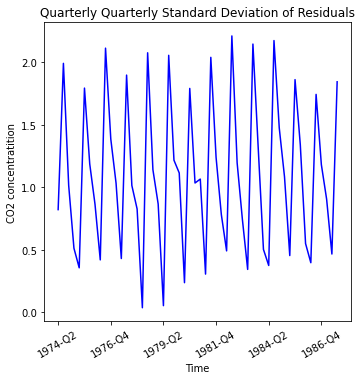

In [19]:
plt.figure(figsize=(5.5, 5.5))
seasonal_sub_series_data['Quarterly Standard Deviation'].plot(color='b')
plt.title('Quarterly Quarterly Standard Deviation of Residuals')
plt.xlabel('Time')
plt.ylabel('CO2 concentratition')
plt.xticks(rotation=30)
#plt.savefig('plots/ch1/B07887_01_09.png', format='png', dpi=300)

Text(0, 0.5, 'CO2 concentratition')

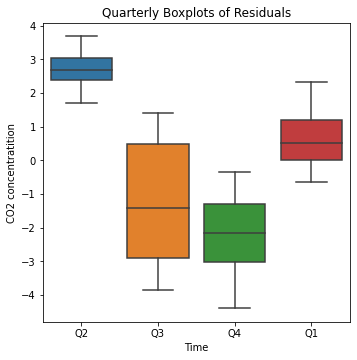

In [20]:
#Multiple box plots to visualize central tendency and dispersion of seasonal sub series
plt.figure(figsize=(5.5, 5.5))
g = sns.boxplot(data=data, y='Residuals', x='Quarter')
g.set_title('Quarterly Boxplots of Residuals')
g.set_xlabel('Time')
g.set_ylabel('CO2 concentratition')
#plt.savefig('plots/ch1/B07887_01_10.png', format='png', dpi=300)

In [23]:
inflation = pd.read_excel('inflation-consumer-prices-annual.xlsx', parse_dates=['Year'])

C:\ProgramData\Anaconda3\lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [24]:
inflation.head()

,Year,India,United States
0,1960-01-01,1.783265,1.509929
1,1961-01-01,1.752022,1.075182
2,1962-01-01,3.576159,1.116071
3,1963-01-01,2.941176,1.214128
4,1964-01-01,13.354037,1.308615


Text(0.5, 0, 'Years')

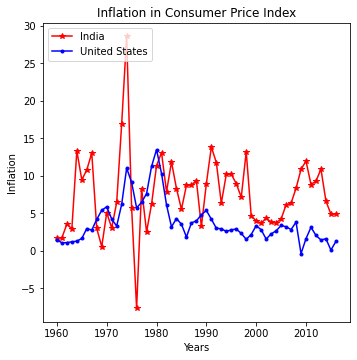

In [25]:
plt.figure(figsize=(5.5, 5.5))
plt.plot(range(1960,2017), inflation['India'], linestyle='-', marker='*', color='r')
plt.plot(range(1960,2017), inflation['United States'], linestyle='-', marker='.', color='b')
plt.legend(['India','United States'], loc=2)
plt.title('Inflation in Consumer Price Index')
plt.ylabel('Inflation')
plt.xlabel('Years')
#plt.savefig('plots/ch1/B07887_01_11.png', format='png', dpi=300)